# Example issues in glider data

The purpose of this notebook is to demonstrate the functionality of the glidertest functions. We will use example data containing various issues to showcase how glidertest can help identify and visualize these problems.

The notebook is organized into sections based on different variables, with each section focusing on specific issues. We have selected datasets where these issues are particularly prominent, allowing for clearer demonstrations.
#### 1) CTD
    - Up-down bias
#### 2) Dissolved oxygen
   - Temporal drift
   - Hysteresis
#### 3) Bio-optics
   - Temporal drift - CDOM
   - Temporal drift - Chlorophyll
   - Fluorescence quenching
   - Hysteresis - Phycocyanin
   - Negative raw counts - Phycocyanin
#### 4) Photosynthetically active radiation (PAR)
   - Pitch effect - up and downcast bias
#### 5) Dive performance

In [3]:
import sys
sys.path.append('C:\\Users\\u241346\\uni_hamburg\\glidertest')
from glidertest import fetchers,tools, plots, utilities, summary_sheet

In [4]:
import matplotlib.pyplot as plt
import gsw
import ast
import numpy as np
from glidertest import fetchers,tools, plots, utilities, summary_sheet

# 1) CTD

## Up-down bias

In [18]:
ds = fetchers.load_sample_dataset(dataset_name='sg638_20191205T121839_delayed.nc')

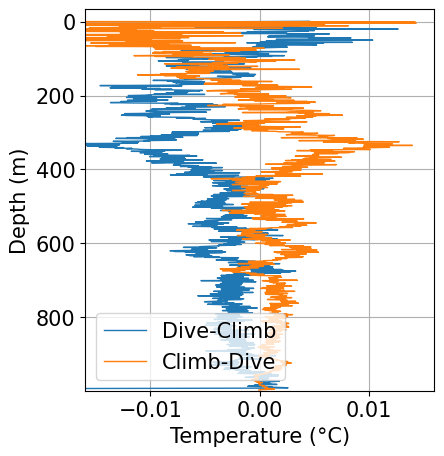

In [12]:
plots.plot_updown_bias(ds, var='TEMP', v_res=1);

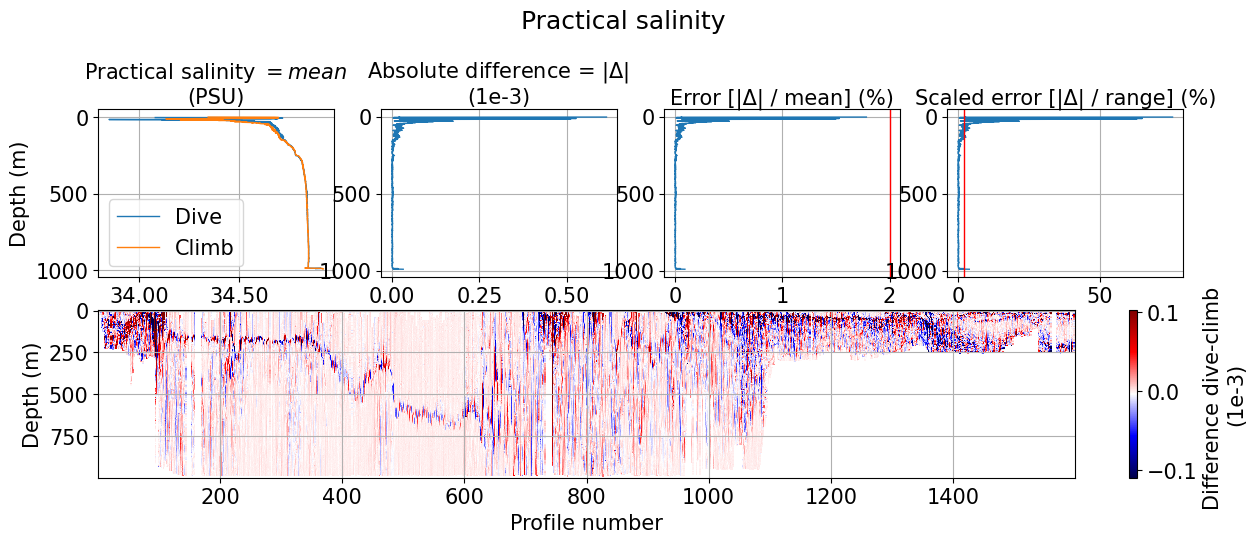

In [8]:
fig, ax = plots.plot_hysteresis(ds, var='PSAL');

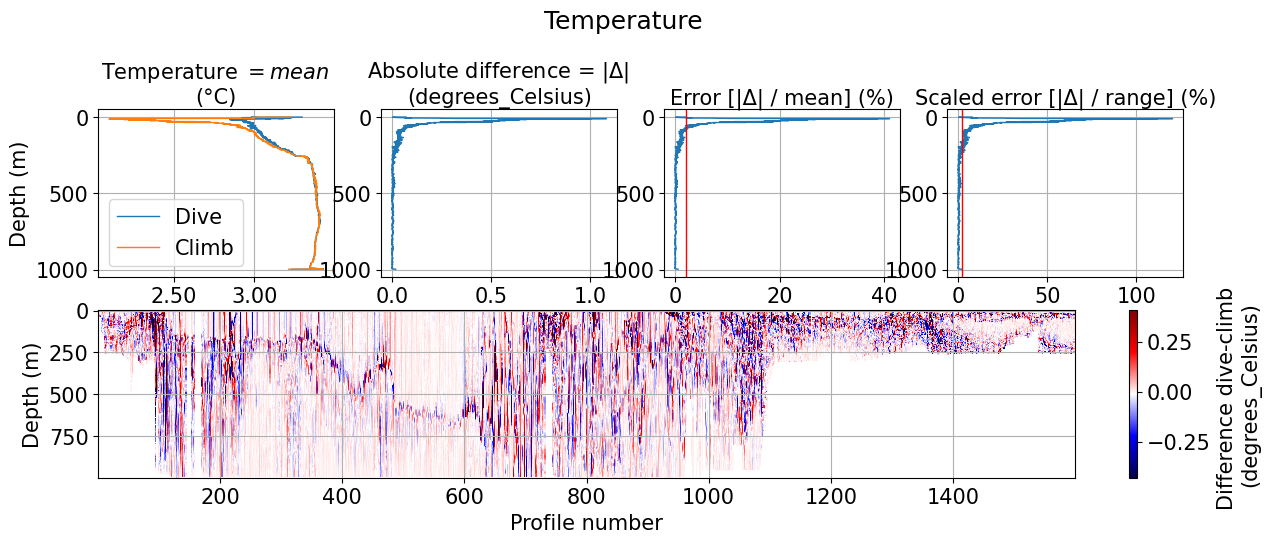

In [9]:
fig, ax = plots.plot_hysteresis(ds, var='TEMP');

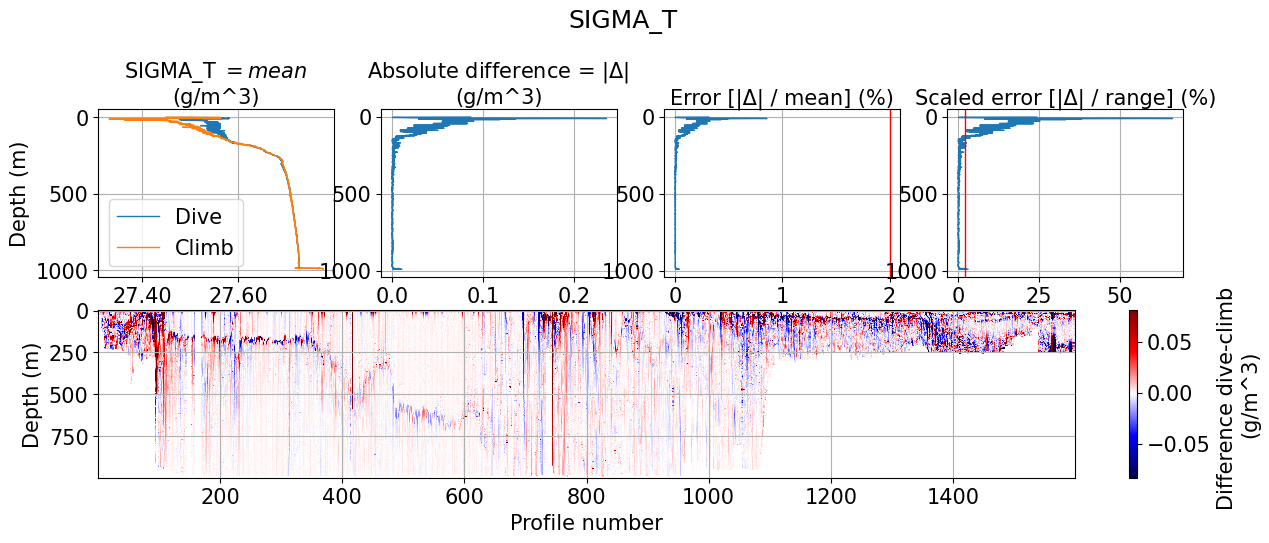

In [11]:
fig, ax = plots.plot_hysteresis(ds, var='SIGMA_T');

In [19]:
ds

<xarray.Dataset> Size: 609MB
Dimensions:                 (N_MEASUREMENTS: 2494919)
Coordinates:
    TIME                    (N_MEASUREMENTS) datetime64[ns] 20MB ...
    LONGITUDE               (N_MEASUREMENTS) float64 20MB ...
    LATITUDE                (N_MEASUREMENTS) float64 20MB ...
    DEPTH                   (N_MEASUREMENTS) float64 20MB ...
Dimensions without coordinates: N_MEASUREMENTS
Data variables: (12/50)
    delta_time_s            (N_MEASUREMENTS) float64 20MB ...
    GLIDE_SPEED_QC          (N_MEASUREMENTS) float32 10MB ...
    CNDC_RAW_QC             (N_MEASUREMENTS) float32 10MB ...
    CNDC_QC                 (N_MEASUREMENTS) float32 10MB ...
    TEMP_QC                 (N_MEASUREMENTS) float32 10MB ...
    TEMP_RAW_QC             (N_MEASUREMENTS) float32 10MB ...
    ...                      ...
    PHASE_QC                (N_MEASUREMENTS) int64 20MB ...
    DEPTH_Z                 (N_MEASUREMENTS) float64 20MB ...
    PLATFORM_SERIAL_NUMBER  <U5 20B ...
    PLATFORM_MODEL          <U44 176B ...
    WMO_IDENTIFIER          <U7 28B ...
    TRAJECTORY              <U21 84B ...
Attributes: (12/38)
    title:                                      OceanGliders trajectory file
    id:                                         sg638_20191205T121839_delayed
    platform:                                   sub-surface gliders
    platform_vocabulary:                        https://vocab.nerc.ac.uk/coll...
    naming_authority:                           edu.washington.apl
    institution:                                Applied Physics Lab\nUniversi...
    ...                                         ...
    date_modified:                              20250407T130511
    license:                                    These data may be redistribut...
    file_version:                               2.71
    keywords_vocabulary:                        NASA/GCMD Earth Science Keywo...
    keywords:                                   Water Temperature, Conductivi...
    contributer_email:                          null@null.com

# 2) Dissolved oxygen

## Temporal drift

In this mission, we observe a clear temporal drift in the oxygen data, which appears unnatural. To minimize the potential influence of changing water temperature, we decide to plot oxygen saturation instead. For more details on this specific issue, please refer to this report:
https://observations.voiceoftheocean.org/static/img/reports/Quality_Issue_1_AROD.pdf

In [13]:
ds = fetchers.load_sample_dataset(dataset_name='sea077_20230316T1019_delayed.nc')

In [ ]:
o2sol = gsw.O2sol(ds.PSAL, ds.TEMP, ds.PRES, ds.LATITUDE, ds.LONGITUDE)
o2sat = 100 * ds.DOXY / o2sol
ds['DOXY_SAT'] = o2sat
ds['DOXY_SAT'] = ds['DOXY_SAT'].assign_attrs(units='%')

In [ ]:
plots.check_temporal_drift(ds, var='DOXY_SAT');

## Hysteresis

In this example mission, the oxygen data exhibit significant hysteresis, and the issue appears to worsen over time. We explore whether this could be related to day-night differences as well.

In [ ]:
# Both datasets have a very similar issue

#ds = fetchers.load_sample_dataset(dataset_name="sea055_20240628T0856_delayed.nc")
ds = fetchers.load_sample_dataset(dataset_name="sea055_20241009T1345_delayed.nc")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plots.plot_updown_bias(ds, var='DOXY', v_res=1, ax=ax[0])
plots.plot_daynight_avg(ds, var='DOXY', ax=ax[1])
plt.show();

In [ ]:
fig, ax = plots.plot_hysteresis(ds, var='DOXY');

# 3) Optics 

## Temporal drift - CDOM

In this example mission, we observe a noticeable drift in CDOM across the entire water column, which appears unnatural. For more information on this issue, please refer to this report https://observations.voiceoftheocean.org/static/img/reports/Quality_Issue_2_CDOM.pdf

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name='sea077_20220906T0748_delayed.nc')

In [ ]:
plots.check_temporal_drift(ds, var='CDOM');

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
var='CDOM'
c=ax.scatter(ds.TIME,ds.DEPTH ,c=ds[var],vmin=np.nanpercentile(ds.CDOM, 0.5), vmax=np.nanpercentile(ds.CDOM, 99.5))
ax.invert_yaxis()
plt.colorbar(c, label = f'{utilities.plotting_labels(var)} ({utilities.plotting_units(ds,var)})')
plt.show();

## Temporal drift - Chlorophyll

In this example mission, we observe a clear drift in the chlorophyll data. As noted in the metadata, water leakage in the payload section of the glider is likely the cause of this drift.

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name="sea076_20230620T1201_delayed.nc")

In [ ]:
ds.comment

In [ ]:
plots.check_temporal_drift(ds, var='CHLA');

In [ ]:
plots.process_optics_assess(ds, var='CHLA');

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
var='CHLA'
c=ax.scatter(ds.TIME,ds.DEPTH ,c=ds[var],vmin=np.nanpercentile(ds[var], 0.5), vmax=np.nanpercentile(ds[var], 99.5))
ax.invert_yaxis()
plt.colorbar(c, label = f'{utilities.plotting_labels(var)} ({utilities.plotting_units(ds,var)})')
plt.show();

## Fluorescence quenching

In this example dataset, we observe clear fluorescence quenching during the daytime within the top 10 meters of the water column. The orange lines indicate sunrise, while the blue lines represent sunset.

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name="sea045_20230530T0832_delayed.nc")

In [ ]:
print(f' Start {ds.TIME[0].values} - End {ds.TIME[-1].values}' )

In [ ]:
plots.plot_quench_assess(ds, 'CHLA', ax=None, ylim=45,start_time='2023-05-30', end_time='2023-06-04');

## Hysteresis - Phycocyanin

In this example dataset, we observe clear hysteresis in the phycocyanin data.

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name='sea069_20230726T0628_delayed.nc');

In [ ]:
fig, ax = plots.plot_hysteresis(ds, var='PHYCOCYANIN');

## Negative raw counts - Phycocyanin

The dataset consistently shows negative values. To investigate further, we check the raw counts (sensor engineering units) to determine if the issue is related to inaccurate calibration factors. We observe that the raw counts are also negative, and significant hysteresis is present.

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name='sea067_20221113T0853_delayed.nc')

In [ ]:
ds['SENSOR_FLUOROMETERS_7313'].calibration_parameters

In [ ]:
sf = ast.literal_eval(ds['SENSOR_FLUOROMETERS_7313'].calibration_parameters)['PC_SF']
dc = ast.literal_eval(ds['SENSOR_FLUOROMETERS_7313'].calibration_parameters)['PC_DarkCounts']

ds['PHYCO_COUNTS']= (ds['PHYCOCYANIN']/sf)+dc
ds['PHYCO_COUNTS'] = ds['PHYCO_COUNTS'].assign_attrs(units='counts')

In [ ]:
fig, ax = plots.plot_hysteresis(ds, var='PHYCO_COUNTS');

# 4) Photosynthetically active radiation (PAR)

## Pitch effect - up and downcast bias

In this dataset, we demonstrate how the pitch and navigation patterns of the glider can impact the quality of PAR data. We show that the angle at which the PAR sensor faces the upper water column can significantly influence the data.

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name="sea045_20230530T0832_delayed.nc")

In [ ]:
plots.plot_updown_bias(ds, var='DPAR', v_res=1);

# 5) Dive performance

This example illustrates a mission where the glider loitered to conserve battery. Long loitering dives were alternated with normal dives during which the glider collected data.

In [ ]:
ds = fetchers.load_sample_dataset(dataset_name='sea063_20230811T1657_delayed.nc')

In [ ]:
duration = tools.compute_prof_duration(ds)
rolling_mean, overtime = tools.find_outlier_duration(duration,rolling=20, std=2)

fig, ax = plots.plot_outlier_duration(ds, rolling_mean, overtime, std=2);